# 1. Import modules and load MERFISH data 

In [54]:
# default imports
import numpy as np
import pandas as pd
import os, sys
import re
import matplotlib.pyplot as plt
print(os.getpid())

33644


In [1]:
# scanpy related imports
#import seaborn as sns
#import anndata
#import scanpy as sc


#sc.settings.n_jobs = 24
#sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')


In [56]:
# ChromAn related imports
sys.path.append(r'C:\Softwares\Github\MerScope01')
from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [93]:
def _parse_list(inputString: str, dtype=float):
    if ',' in inputString:
        return np.fromstring(inputString.strip('[] '), dtype=dtype, sep=',')
    else:
        return np.fromstring(inputString.strip('[] '), dtype=dtype, sep=' ')


def _parse_int_list(inputString: str):
    return _parse_list(inputString, dtype=int)

In [94]:
data_organization = pd.read_csv(os.path.join(merlin_output_folder, 'dataorganization.csv'),
                               converters={'frame': _parse_int_list, 'zPos': _parse_list}) 

In [104]:
isinstance(data_organization.iloc[1]['fiducialFrame'], np.integer)

True

In [102]:
type(data_organization.iloc[1]['frame'])

numpy.ndarray

In [97]:
data_organization.iloc[1]['zPos']

array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
       16.5, 18. , 19.5, 21. ])

## 1.1 Input/output folder

In [47]:
merlin_output_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230622-4T1primary_C2'
#merlin_output_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230513-wtBrain_MO4'
# generate post-analysis folders
#postanalysis_folder = merlin_output_folder+'_PostAnalysis'
postanalysis_folder = os.path.join(merlin_output_folder, 'PostAnalysis')
if not os.path.exists(postanalysis_folder):
    print(f"Create postanalysis_folder: {postanalysis_folder}")
    os.makedirs(postanalysis_folder)
else:
    print(f"Use postanalysis_folder: {postanalysis_folder}")

Create postanalysis_folder: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230622-4T1primary_C2\PostAnalysis


# 2. Load MERLin decoding results

In [57]:
import tifffile
decode_folder = os.path.join(merlin_output_folder, 'Decode', 'images')


In [60]:
test_im = tifffile.imread(os.path.join(decode_folder, os.listdir(decode_folder)[1]))

<IPython.core.display.Javascript object>


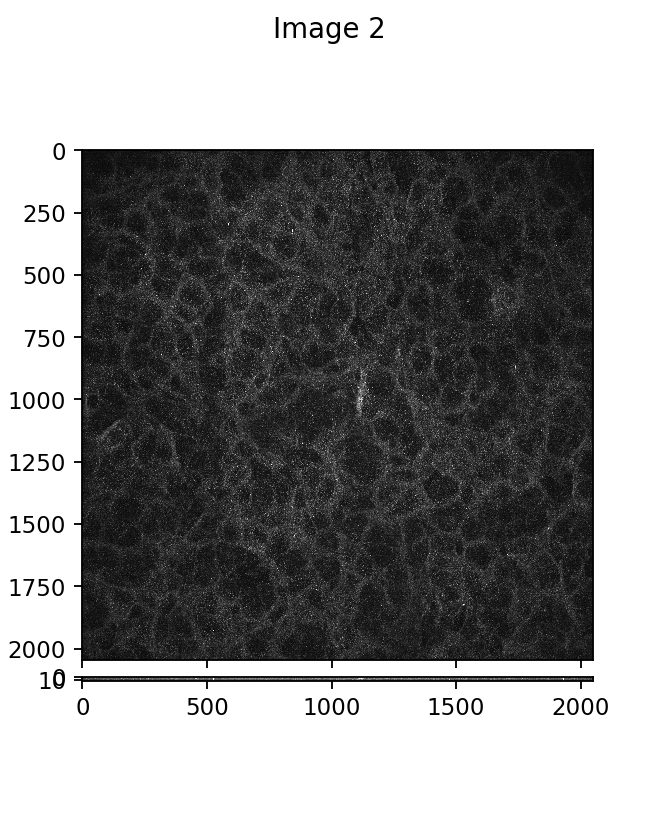

In [61]:
%matplotlib notebook
interactive.imshow_mark_3d([test_im[0::3],test_im[1::3],test_im[2::3]])

In [83]:
fiducial_folder = os.path.join(merlin_output_folder, 'FiducialCorrelationWarp', 'images')
test_fiducial_im = tifffile.imread(os.path.join(fiducial_folder, os.listdir(fiducial_folder)[11]))

<IPython.core.display.Javascript object>


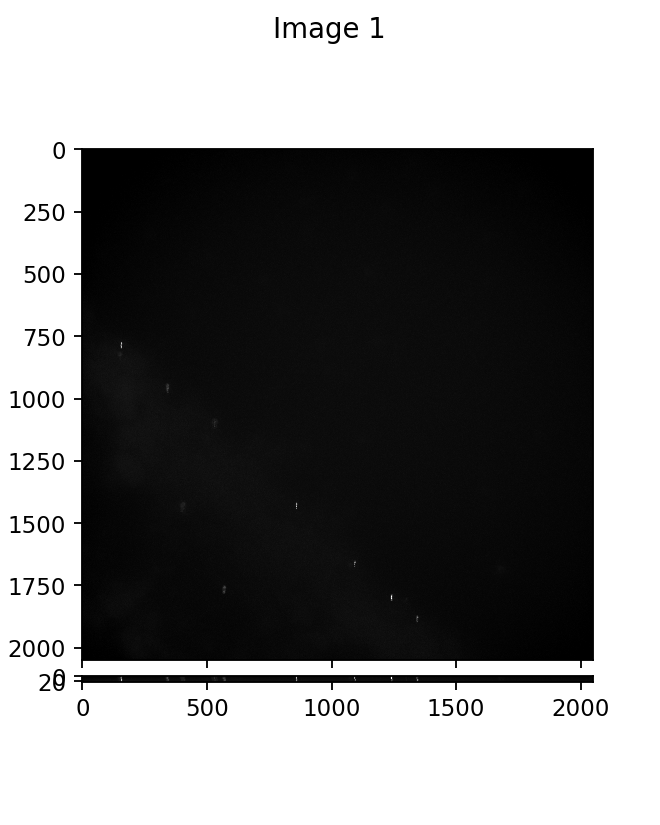

In [86]:
%matplotlib notebook
interactive.imshow_mark_3d([test_fiducial_im], min_max_default=[500,5000])

# Test fiducial correction parameters

In [64]:

from skimage import registration

In [82]:
registration.phase_cross_correlation(test_fiducial_im[0],test_fiducial_im[11],upsample_factor=100,normalization=None)[0]

array([-0.01,  0.02])

In [73]:
fiducial_output_folder = os.path.join(merlin_output_folder, 'FiducialCorrelationWarp', 'transformations')
print(fiducial_output_folder)
test_transform = np.load(os.path.join(fiducial_output_folder, os.listdir(fiducial_output_folder)[10]),
                         allow_pickle=True)

\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\MERFISH_analysis\20230622-4T1primary_C2\FiducialCorrelationWarp\transformations


In [74]:
test_transform

array([[[ 1.  , -0.  , -0.  ],
        [ 0.  ,  1.  , -0.  ],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -0.  ],
        [ 0.  ,  1.  , -0.  ],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -0.56],
        [ 0.  ,  1.  , -4.3 ],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -0.56],
        [ 0.  ,  1.  , -4.3 ],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -1.08],
        [ 0.  ,  1.  , -9.46],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -1.08],
        [ 0.  ,  1.  , -9.46],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -1.2 ],
        [ 0.  ,  1.  , -9.77],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -1.2 ],
        [ 0.  ,  1.  , -9.77],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -0.  ],
        [ 0.  ,  1.  , -0.  ],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -0.  ],
        [ 0.  ,  1.  , -0.  ],
        [ 0.  ,  0.  ,  1.  ]],

       [[ 1.  , -0.  , -0.  ],
        [ 0.  ,  1.